#House Price Prediction with Machine Learning Algorithms
The housing market is a crucial component of any economy, and housing prices serve as an essential indicator of economic health. For buyers and sellers alike, understanding housing price ranges is crucial. However, the process of buying or selling a home can be daunting, often requiring extensive research, negotiations, and careful consideration of local factors.

To facilitate this process, machine learning algorithms can be used to accurately predict housing prices based on a wide range of explanatory variables related to residential properties. The goal of this project is to develop a regression model capable of accurately estimating the price of a home given its various features. By leveraging machine learning techniques, we can create a reliable tool to help buyers and sellers make informed decisions about their real estate transactions.

##Database
Here's a brief version of what you'll find in the data description file.

* **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass**: The building class
* **MSZoning**: The general zoning classification
* **LotFrontage**: Linear feet of street connected to property
* **LotArea**: Lot size in square feet
* **Street**: Type of road access
* **Alley**: Type of alley access
* **LotShape**: General shape of property
* **LandContour**: Flatness of the property
* **Utilities**: Type of utilities available
* **LotConfig**: Lot configuration
* **LandSlope**: Slope of property
* **Neighborhood**: Physical locations within Ames city limits
* **Condition1**: Proximity to main road or railroad
* **Condition2**: Proximity to main road or railroad (if a second is present)
* **BldgType**: Type of dwelling
* **HouseStyle**: Style of dwelling
* **OverallQual**: Overall material and finish quality
* **OverallCond**: Overall condition rating
* **YearBuilt**: Original construction date
* **YearRemodAdd**: Remodel date
* **RoofStyle**: Type of roof
* **RoofMatl**: Roof material
* **Exterior1st**: Exterior covering on house
* **Exterior2nd**: Exterior covering on house (if more than one material)
* **MasVnrType**: Masonry veneer type
* **MasVnrArea**: Masonry veneer area in square feet
* **ExterQual**: Exterior material quality
* **ExterCond**: Present condition of the material on the exterior
* **Foundation**: Type of foundation
* **BsmtQual**: Height of the basement
* **BsmtCond**: General condition of the basement
* **BsmtExposure**: Walkout or garden level basement walls
* **BsmtFinType1**: Quality of basement finished area
* **BsmtFinSF1**: Type 1 finished square feet
* **BsmtFinType2**: Quality of second finished area (if present)
* **BsmtFinSF2**: Type 2 finished square feet
* **BsmtUnfSF**: Unfinished square feet of basement area
* **TotalBsmtSF**: Total square feet of basement area
* **Heating**: Type of heating
* **HeatingQC**: Heating quality and condition
* **CentralAir**: Central air conditioning
* **Electrical**: Electrical system
* **1stFlrSF**: First Floor square feet
* **2ndFlrSF**: Second floor square feet
* **LowQualFinSF**: Low quality finished square feet (all floors)
* **GrLivArea**: Above grade (ground) living area square feet
* **BsmtFullBath**: Basement full bathrooms
* **BsmtHalfBath**: Basement half bathrooms
* **FullBath**: Full bathrooms above grade
* **HalfBath**: Half baths above grade
* **Bedroom**: Number of bedrooms above basement level
* **Kitchen**: Number of kitchens
* **KitchenQual**: Kitchen quality
* **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
* **Functional**: Home functionality rating
* **Fireplaces**: Number of fireplaces
* **FireplaceQu**: Fireplace quality
* **GarageType**: Garage location
* **GarageYrBlt**: Year garage was built
* **GarageFinish**: Interior finish of the garage
* **GarageCars**: Size of garage in car capacity
* **GarageArea**: Size of garage in square feet
* **GarageQual**: Garage quality
* **GarageCond**: Garage condition
* **PavedDrive**: Paved driveway
* **WoodDeckSF**: Wood deck area in square feet
* **OpenPorchSF**: Open porch area in square feet
* **EnclosedPorch**: Enclosed porch area in square feet
* **3SsnPorch**: Three season porch area in square feet
* **ScreenPorch**: Screen porch area in square feet
* **PoolArea**: Pool area in square feet
* **PoolQC**: Pool quality
* **Fence**: Fence quality
* **MiscFeature**: Miscellaneous feature not covered in other categories
* **MiscVal**: $Value of miscellaneous feature
* **MoSold**: Month Sold
* **YrSold**: Year Sold
* **SaleType**: Type of sale
* **SaleCondition**: Condition of sale

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [16]:
# Load the dataset from the csv file and create a Dataframe
def load_dataset(path):
    df = pd.read_csv(path)

    # Print the first 10 rows of the dataset
    print("First 10 rows: ")
    print(df.head(10))
    print("")

    # Print the last 10 rows of the dataset
    print("Last 10 rows: ")
    print(df.tail(10))
    print("")

    # Print the shape of the dataset
    print("Shape: ", df.shape)
    print("")

    # Print the size of the dataset
    print("Size: ", df.size)
    print("")

    # Print the categorical and numerical
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print("Categorical Columns: ", categorical_columns)
    print("Numerical Columns: ", numerical_columns)

    # Print the missing values
    df.isnull().sum()

    return df

df = load_dataset('/content/HousePricePrediction.csv')

First 10 rows: 
   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   
5   5          50       RL    14115    Inside     1Fam            5   
6   6          20       RL    10084    Inside     1Fam            5   
7   7          60       RL    10382    Corner     1Fam            6   
8   8          50       RM     6120    Inside     1Fam            5   
9   9         190       RL     7420    Corner   2fmCon            6   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0

In [17]:
# Process the dataset
def process_dataset(df):
    # Fill the NaN value from 'SalePrice' with mean values
    saleprice_mean = df['SalePrice'].mean()
    df['SalePrice'].fillna(saleprice_mean, inplace=True)

    # Drop all the NaN containing rows
    df = df.dropna()

    # Drop unnecessary item
    df = df.drop(['Id'], axis=1)

    return df

processed_df = process_dataset(df)

<ipython-input-18-d090b410d762>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


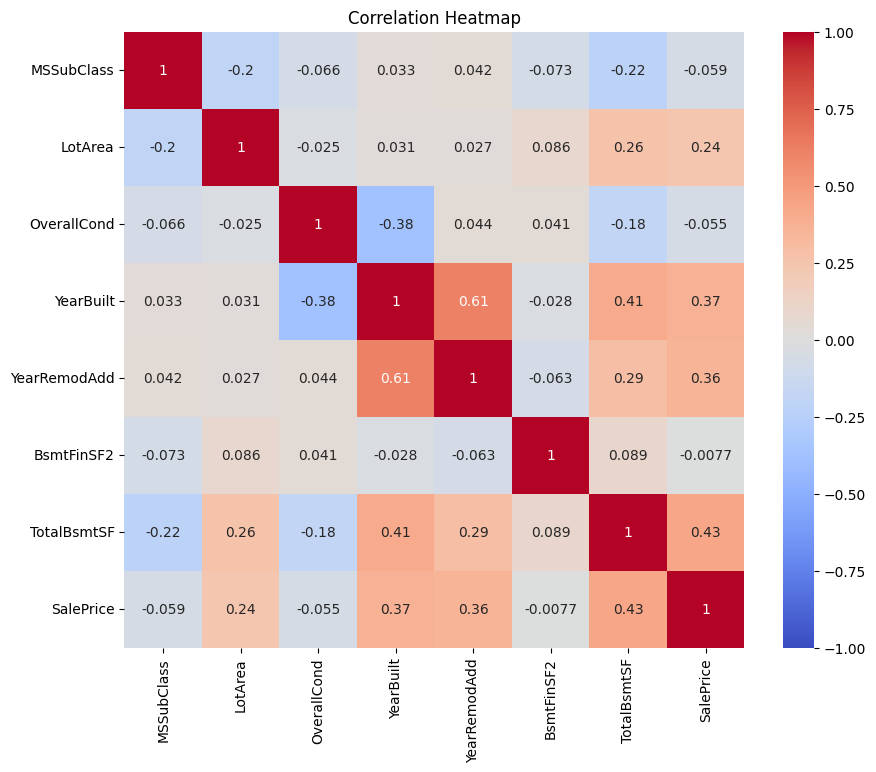

In [18]:
# Understand the correlation of the dataset
def corr_matrix(df):
    # Get the corr matrix
    corr_matrix = df.corr()

    #plot the corr_matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

corr_matrix(processed_df)

##Features Engineering
Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones.  One-hot encoding is a technique used to convert categorical variables into numerical variables. Categorical variables are variables that have a finite number of categories or levels, such as ""gender"" (male, female), ""color"" (red, blue, green), or ""occupation"" (doctor, lawyer, teacher).

In [19]:
def one_hot_encoding(df):
    # Do one hot encoding for all four categorical features and return the updated dataframe.
    categorical_columns = df.select_dtypes(include=['object']).columns
    df_encoded = pd.get_dummies(df, columns=categorical_columns)
    return df_encoded

encoded_df = one_hot_encoding(processed_df)

##Split the dataset
Splitting a dataset into training and testing subsets is a crucial step in the machine learning workflow, as it helps to ensure that the model is able to generalize well to new data and make accurate predictions. Dataset is randomly divided into training and testing sets, with a certain percentage of the data allocated to each subset. The percentage split depends on the size of the dataset, but a common split is 80% for training and 20% for testing and set random state as 0.

In [25]:
def split_data(df):
    # Split the dataset into training and testing subsets
    X = df.drop('SalePrice', axis=1)  # Assuming 'SalePrice' is the target column
    y = df['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(encoded_df)

##Training Regression Models
Apply four regression machine learning models, including Linear Regression, Random Forest Regression, Support Vector Machine Regression, and Ridge Regression to the training dataset. The functions for each model will return the mean absolute percentage error (MAPE) for the respective model. MAPE is a metric used to evaluate the accuracy of a model by calculating the percentage difference between the predicted and actual values. The lower the MAPE, the more accurate the model.

In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))


def fit_linear_regression():
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mape


def fit_Random_Forest_Regression():
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mape


def fit_Support_vector_Machine():
    model = SVR()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mape


def fit_ridge_regression():
    model = Ridge()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, predictions)
    return mape


lr_mape = fit_linear_regression()
rf_mape = fit_Random_Forest_Regression()
svm_mape = fit_Support_vector_Machine()
ridge_mape = fit_ridge_regression()

print('Linear Regression MAPE:', lr_mape)
print('Random Forest Regression MAPE:', rf_mape)
print('Support Vector Machine Regression MAPE:', svm_mape)
print('Ridge Regression MAPE:', ridge_mape)

Linear Regression MAPE: 0.18741683841599854
Random Forest Regression MAPE: 0.1870727869311005
Support Vector Machine Regression MAPE: 0.1870512931870423
Ridge Regression MAPE: 0.18720223297663993


##Model Selection & Evluation
Select the best machine learning model based on the mean absolute percentage error
obtained from the previous task. Once you have selected the best model, you need to implement the evaluate_model() function
that takes the chosen model as input, fits it to the training data, predicts the target variable for the test data,
and calculates and returns the evaluation metrics r2 score, mean absolute error (MAE), and root mean squared error (RMSE)
for the predicted values. The function should use the scikit-learn library's metrics module to calculate these metrics.
The function should return a tuple containing the evaluation metrics

In [28]:
model_mape_values = {
    "Linear Regression": lr_mape,
    "Random Forest Regression": rf_mape,
    "Support Vector Machine Regression": svm_mape,
    "Ridge Regression": ridge_mape
}

best_model_name = min(model_mape_values, key=model_mape_values.get)

if best_model_name == "Linear Regression":
    best_model = LinearRegression()
elif best_model_name == "Random Forest Regression":
    best_model = RandomForestRegressor()
elif best_model_name == "Support Vector Machine Regression":
    best_model = SVR()
else:
    best_model = Ridge()

In [29]:
def evaluate_model():
    best_model.fit(X_train, y_train)
    predictions = best_model.predict(X_test)

    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return r2, mae, rmse


r2, mae, rmse = evaluate_model()

print('R2 Score:', r2)
print('MAE:', mae)
print('RMSE:', rmse)

R2 Score: 1.6224524168606536e-06
MAE: 28848.681203988202
RMSE: 52000.90213813493
